In [1]:
#Importing all the necessary libraries-->

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
import statsmodels.api as sm

In [2]:
air=pd.read_csv('airline_passengers.csv')
air.head()

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0


In [3]:
#Checking for the null values-->

air.isnull().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [4]:
#Dropping the null values-->

air.dropna(inplace=True)

In [5]:
#Converting 'Month' into Datetime-->

air['Month']=pd.to_datetime(air['Month'])

In [6]:
air.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [7]:
#Setting 'Month' as an Index-->

air.set_index('Month', inplace=True)

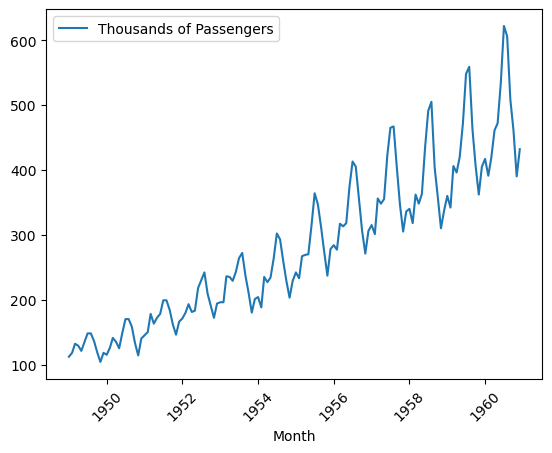

In [8]:
sns.lineplot(air)
plt.xticks(rotation=45)
plt.show()

# Removing the Trend Component-->

In [9]:
#Checking for the stationarity by using ADFuller test-->

from statsmodels.tsa.stattools import adfuller

adfuller(air['Thousands of Passengers'])

(0.8153688792060511,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [10]:
#Here, p value is coming out to be -> .99

In [11]:
#Now we'll do the Differencing to remove the Trend component-->

air['first_difference']=air['Thousands of Passengers']-air['Thousands of Passengers'].shift(1)

In [12]:
air.head(10)

,Thousands of Passengers,first_difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0
1949-06-01,135.0,14.0
1949-07-01,148.0,13.0
1949-08-01,148.0,0.0
1949-09-01,136.0,-12.0


In [13]:
#Dropping the nan values-->

air.dropna(inplace=True)

In [14]:
adfuller(air['first_difference'])

(-2.8292668241699874,
 0.05421329028382711,
 12,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.5069317854084)

In [15]:
#The p value is still greater than 0.05, so we accept the null hypothesis

In [16]:
air['second_difference']=air['first_difference']-air['first_difference'].shift(1)

In [17]:
air.dropna(inplace=True)

In [18]:
adfuller(air['second_difference'])

(-16.384231542468523,
 2.7328918500141235e-29,
 11,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 988.6020417275602)

In [19]:
#here the p value is coming out to be less than 0.05, so we finally reject the null hypothesis

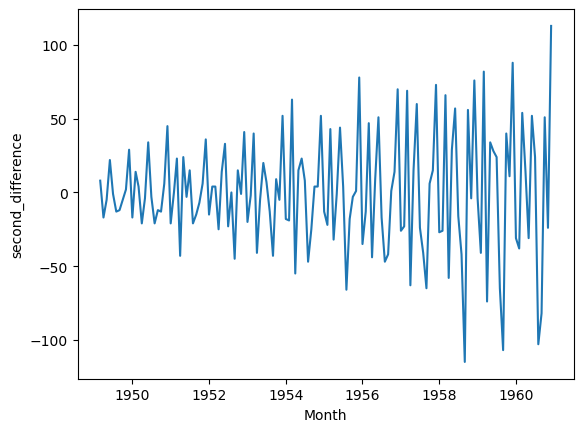

In [20]:
sns.lineplot(air['second_difference'])
plt.show()

# Removing the Seasonal component-->

In [21]:
#Removing the Seasonal component-->

air['12_difference']=air['Thousands of Passengers']-air['Thousands of Passengers'].shift(12)

In [22]:
air.head(20)

,Thousands of Passengers,first_difference,second_difference,12_difference
Month,,,,
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
1949-06-01,135.0,14.0,22.0,NaN
1949-07-01,148.0,13.0,-1.0,NaN
1949-08-01,148.0,0.0,-13.0,NaN
1949-09-01,136.0,-12.0,-12.0,NaN
1949-10-01,119.0,-17.0,-5.0,NaN
1949-11-01,104.0,-15.0,2.0,NaN


In [23]:
air.dropna(inplace=True)

In [24]:
adfuller(air['12_difference'])

(-3.42813913312251,
 0.010036205946729016,
 1,
 128,
 {'1%': -3.4825006939887997,
  '5%': -2.884397984161377,
  '10%': -2.578960197753906},
 905.1204994470843)

In [25]:
#Clearly the p-value is way less than .05, so we reject the null hypo and conclude that our series is Stationary

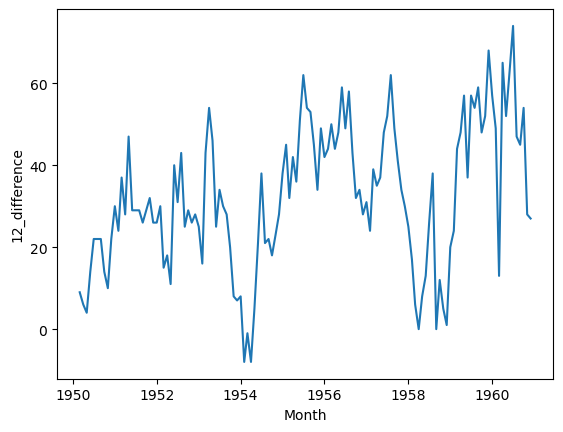

In [26]:
sns.lineplot(air['12_difference'])
plt.show()

In [27]:
air.dropna(inplace=True)

# ACF & PACF Plot-->

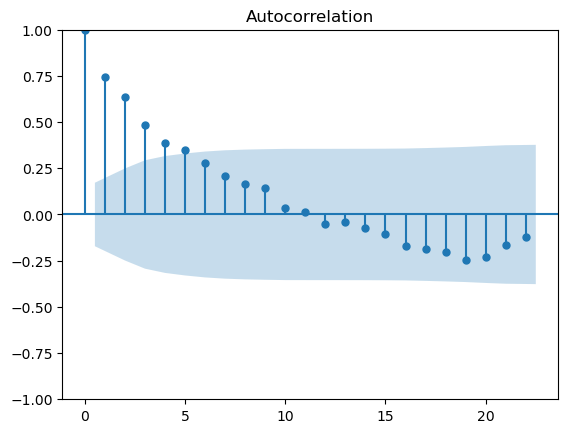

In [28]:
#Plotting the acf and pacf for stationary series-->

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
acf=plot_acf(air['12_difference'])

In [29]:
#From above the order of q=5

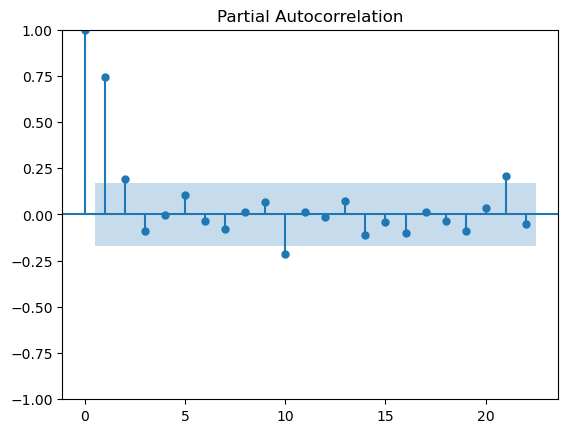

In [30]:
pacf=plot_pacf(air['12_difference'])

In [31]:
#From above the order of p=2

# Train & Test set split-->

In [32]:
#Creating the train and test data

from datetime import datetime, timedelta

In [33]:
train_end=datetime(1955,12,1)
test_end=datetime(1960,12,1)

In [34]:
#training & test datasets-->

train=air[:train_end]
test=air[train_end+timedelta(days=30):test_end]

In [35]:
test.tail()

,Thousands of Passengers,first_difference,second_difference,12_difference
Month,,,,
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0
1960-11-01,390.0,-71.0,-24.0,28.0
1960-12-01,432.0,42.0,113.0,27.0


# Importing Models-->

In [36]:
#Fitting the model-->

import warnings
warnings.filterwarnings('ignore')
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [37]:
sarimax=SARIMAX(train['Thousands of Passengers'], order=(2,0,5), seasonal_order=(0,1,0,12))
sarimax_fit=sarimax.fit()
sarimax_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   70
Model:             SARIMAX(2, 0, 5)x(0, 1, [], 12)   Log Likelihood                -217.767
Date:                             Thu, 08 Feb 2024   AIC                            451.534
Time:                                     00:23:32   BIC                            468.018
Sample:                                 03-01-1950   HQIC                           457.955
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0990      0.206      0.480      0.631      -0.305       0.503
ar.L2          0.8790      0.208      4.219      0.000       0.471       1.287
ma.L1          0.6677      3.816      0.175      0.861      -6.812       8.147
ma.L2         -0.2003      1.286     -0.156      0.876      -2.721       2.321
ma.L3         -0.1919      0.525     -0.365      0.715      -1.221       0.837
ma.L4         -0.2624      1.194     -0.220      0.826      -2.603       2.078
ma.L5          0.0596      0.223      0.268      0.789      -0.377       0.496
sigma2        99.2918    362.597      0.274      0.784    -611.386     809.970
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.38
Prob(Q):                              0.92   Prob(JB):                         0.30
Heteroskedasticity (H):               1.30   Skew:                             0.45
Prob(H) (two-sided):                  0.58   Kurtosis:                         2.58
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [38]:
#Generating the predictions-->

sarimax_pred=sarimax_fit.predict(start=datetime(1956,1,1),end=datetime(1960,12,1))

In [39]:
test['Predictions']=sarimax_pred

In [40]:
test.head()

,Thousands of Passengers,first_difference,second_difference,12_difference,Predictions
Month,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,286.157904
1956-02-01,277.0,-7.0,-13.0,44.0,281.396927
1956-03-01,317.0,40.0,47.0,50.0,311.186949
1956-04-01,313.0,-4.0,-44.0,44.0,312.414236
1956-05-01,318.0,5.0,9.0,48.0,313.783689


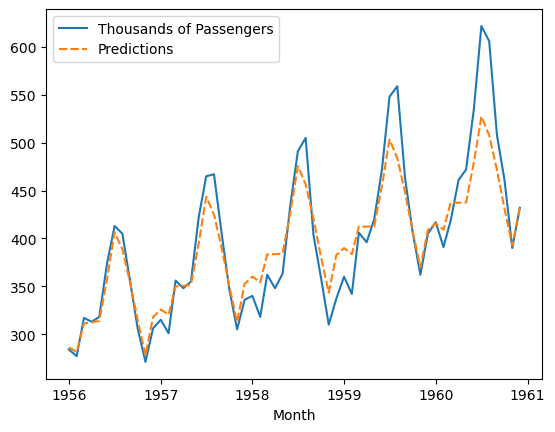

In [41]:
sns.lineplot(test[['Thousands of Passengers','Predictions']])
plt.show()

In [42]:
#Need to convert the actuals & predictions into Array to calculate the Mape value

def MAPE(actuals, predictions):
    actuals, predictions=np.array(actuals), np.array(predictions)
    return np.mean(np.abs((actuals-predictions)/actuals))*100

In [43]:
MAPE(test['Thousands of Passengers'],test['Predictions'])

4.944432924299434

In [44]:
#which means our accuracy is more than 95%

# Forecasting-->

In [45]:
#Now we're fitting the model on our entire data

sarimax=SARIMAX(air['Thousands of Passengers'], order=(2,0,5), seasonal_order=(0,1,0,12))
sarimax_fit=sarimax.fit()

In [46]:
#Generating the Forecast for the next one year-->

forecast=sarimax_fit.predict(start=datetime(1961,1,1), end=datetime(1961,12,1), typ='levels').rename('Forecasts')

In [47]:
forecast

1961-01-01    448.333277
1961-02-01    416.364012
1961-03-01    457.515295
1961-04-01    491.088058
1961-05-01    508.443998
1961-06-01    565.349048
1961-07-01    656.625516
1961-08-01    636.281963
1961-09-01    541.121744
1961-10-01    490.994156
1961-11-01    421.842262
1961-12-01    461.559797
Freq: MS, Name: Forecasts, dtype: float64

In [48]:
#Exporting the forecasts-->

forecast.to_csv('forescasted_values.csv')